In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

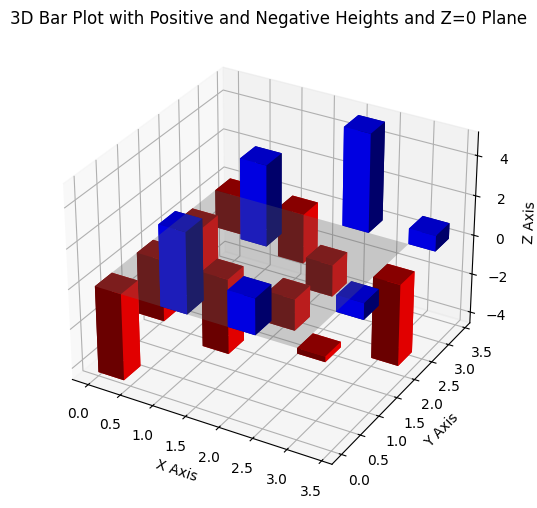

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建数据
x = np.arange(4)  # X 轴的位置
y = np.arange(4)  # Y 轴的位置
x, y = np.meshgrid(x, y)  # 创建网格
z = np.zeros_like(x)  # Z 轴的初始值

# 高度数据（柱的高度），添加随机负值
dx = np.ones_like(x) * 0.4  # 每个柱的宽度，减小宽度
dy = np.ones_like(y) * 0.4  # 每个柱的深度，减小深度
dz = (np.random.rand(4, 4) * 10) - 5  # 随机生成柱的高度，并加入负值，范围是[-5, 5]

# 创建图形
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# 设置不同的颜色：正值为蓝色，负值为红色
colors = np.where(dz >= 0, 'b', 'r')  # 如果dz大于等于0，则为蓝色，反之为红色

# 绘制 3D 柱状图
for i in range(len(x.flatten())):
    ax.bar3d(x.flatten()[i], y.flatten()[i], z.flatten()[i], dx.flatten()[i], dy.flatten()[i], dz.flatten()[i], color=colors.flatten()[i], zsort='average')

# 添加 z=0 平面
x_plane, y_plane = np.meshgrid(np.linspace(np.min(x), np.max(x), 10), np.linspace(np.min(y), np.max(y), 10))
z_plane = np.zeros_like(x_plane)  # z=0 平面
ax.plot_surface(x_plane, y_plane, z_plane, color='gray', alpha=0.3, rstride=100, cstride=100)

# 设置标题和标签
ax.set_title('3D Bar Plot with Positive and Negative Heights and Z=0 Plane')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# 显示图形
plt.show()


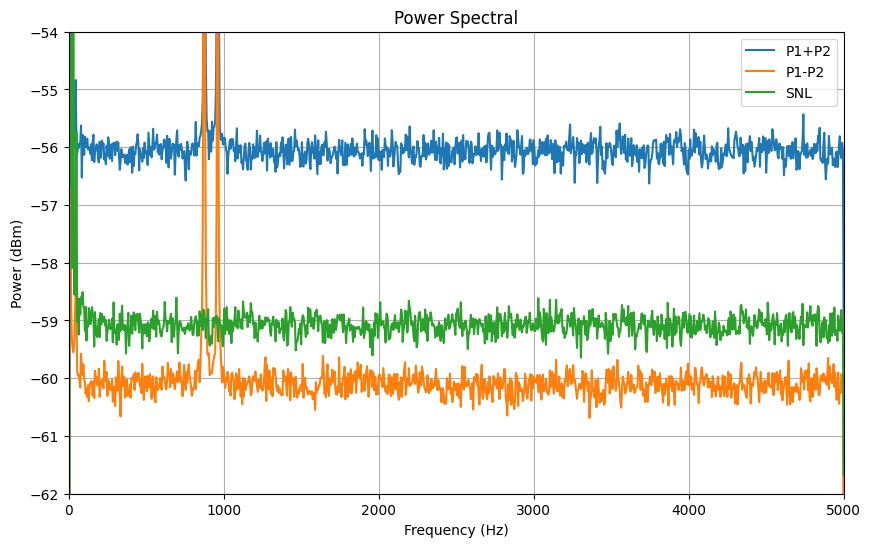

In [3]:
# Plot
yrange = 8
yref = -58
plt.figure(figsize=(10, 6))
plt.plot(testdata_freq['frequency'], testdata_freq['P1+P2'], label='P1+P2')
# plt.plot(testdata_freq['frequency'], testdata_freq['X1+X2(2)'], label='X1+X2(2)')
plt.plot(testdata_freq['frequency'], testdata_freq['P1-P2'], label='P1-P2')
# plt.plot(testdata_freq['frequency'], testdata_freq['P1-P2(2)'], label='P1-P2(2)')
plt.plot(testdata_freq['frequency'], testdata_freq['SNL'], label='SNL')

plt.title('Power Spectral')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.xlim(0,5000)
plt.ylim(yref-yrange/2, yref+yrange/2)
plt.legend()
plt.grid(True)
plt.show()

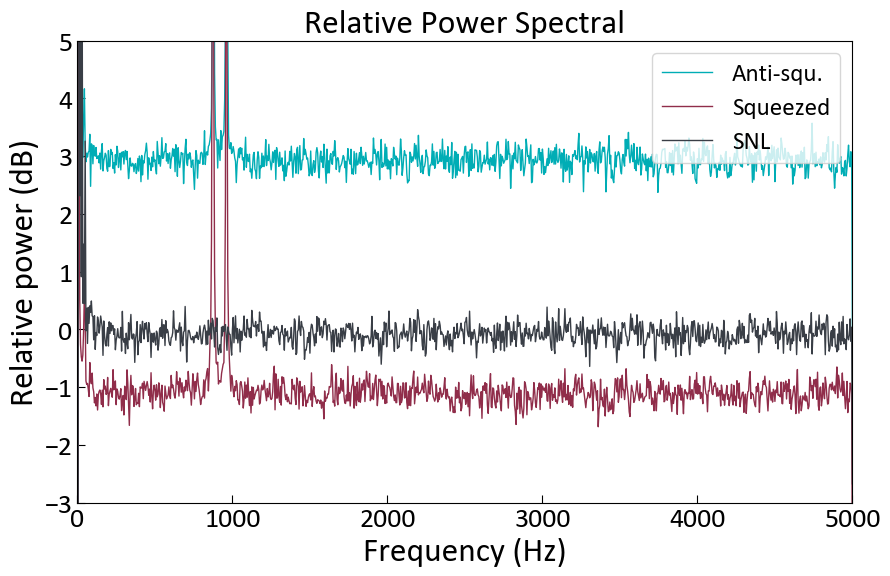

In [4]:
# Plot
yrange = 8
yref = 1
plt.figure(figsize=(10, 6))
plt.plot(testdata_freq['frequency'], testdata_freq['P1+P2']+59, color='#00adb5ff', linestyle='-', lw=1, label='Anti-squ.')
# plt.plot(testdata_freq['frequency'], testdata_freq['X1+X2(2)'], label='X1+X2(2)')
plt.plot(testdata_freq['frequency'], testdata_freq['P1-P2']+59, color='#902d4aff', linestyle='-', lw=1, label='Squeezed')
# plt.plot(testdata_freq['frequency'], testdata_freq['P1-P2(2)'], label='P1-P2(2)')
plt.plot(testdata_freq['frequency'], testdata_freq['SNL']+59, color='#393e46ff', linestyle='-', lw=1, label='SNL')


# 设置字体和字体大小
title_font = {'family': 'calibri', 'color':  'black', 'weight': 'normal', 'size': 24}
label_font = {'family': 'calibri', 'color':  'black', 'weight': 'normal', 'size': 24}
# 设置图例字体
legend_font = FontProperties(family='calibri', weight='normal', size=18)
# 设置刻度字体
plt.xticks(fontsize=20, fontname='calibri', weight='normal', color='black')  # 设置x轴刻度字体
plt.yticks(fontsize=20, fontname='calibri', weight='normal', color='black')  # 设置y轴刻度字体
# 设置刻度线向内
plt.tick_params(axis='both', direction='in', length=6)  # 轴 'both' 表示x轴和y轴都应用此设置，direction='in' 表示刻度线向内，length=6 设置刻度线长度

plt.title('Relative Power Spectral', fontdict=title_font)
plt.xlabel('Frequency (Hz)', fontdict=label_font)
plt.ylabel('Relative power (dB)', fontdict=label_font)
plt.xlim(0,5000)
plt.ylim(yref-yrange/2, yref+yrange/2)
plt.legend(prop=legend_font, loc='upper right')
# plt.grid(True)
plt.savefig('data/24.11.13/压缩频域.png', format='png', dpi=300)  # 可选择 'pdf' 或 'svg' 等格式
plt.show()

In [5]:
variances_raw = testdata_time.iloc[:, 1:].var()
variances = variances_raw / variances_raw['SNL']
print(variances)


X1+X2       0.740950
X1+P2       1.282123
P1+P2       1.568774
P1+X2       1.181501
P1-P2       0.711489
P1-X2       0.970498
X1-X2       1.571640
X1-P2       0.958872
X1+X2(2)    0.733691
X1+P2(2)    1.191049
P1+P2(2)    1.590501
P1+X2(2)    1.104571
P1-P2(2)    0.725382
P1-X2(2)    0.917159
X1-X2(2)    1.566131
X1-P2(2)    0.986321
X1          0.608877
X2          0.571132
P1          0.617868
P2          0.529025
SNL         1.000000
dtype: float64


In [6]:
matrix_qqpp = np.zeros((4, 4))
matrix_qpqp = np.zeros((4, 4))

matrix_qqpp[0, 0] = variances['X1']
matrix_qqpp[1, 1] = variances['X2']
matrix_qqpp[2, 2] = variances['P1']
matrix_qqpp[3, 3] = variances['P2']

matrix_qqpp[0, 1] = (-variances['X1-X2'] + variances['X1'] + variances['X2'])/2
# matrix_qqpp[0, 1] = (variances['X1+X2'] - variances['X1'] - variances['X2'])/2
matrix_qqpp[1, 0] = matrix_qqpp[0, 1]
matrix_qqpp[2, 3] = (-variances['P1-P2'] + variances['P1'] + variances['P2'])/2
# matrix_qqpp[2, 3] = (variances['P1+P2'] - variances['P1'] - variances['P2'])/2
matrix_qqpp[3, 2] = matrix_qqpp[2, 3]
print(matrix_qqpp)

matrix_qpqp[0, 0] = matrix_qqpp[0, 0]
matrix_qpqp[0, 1] = matrix_qqpp[0, 2]
matrix_qpqp[0, 2] = matrix_qqpp[0, 1]
matrix_qpqp[0, 3] = matrix_qqpp[0, 3]
matrix_qpqp[1, 0] = matrix_qqpp[2, 0]
matrix_qpqp[1, 1] = matrix_qqpp[2, 2]
matrix_qpqp[1, 2] = matrix_qqpp[2, 1]
matrix_qpqp[1, 3] = matrix_qqpp[2, 3]
matrix_qpqp[2, 0] = matrix_qqpp[1, 0]
matrix_qpqp[2, 1] = matrix_qqpp[1, 2]
matrix_qpqp[2, 2] = matrix_qqpp[1, 1]
matrix_qpqp[2, 3] = matrix_qqpp[1, 3]
matrix_qpqp[3, 0] = matrix_qqpp[3, 0]
matrix_qpqp[3, 1] = matrix_qqpp[3, 2]
matrix_qpqp[3, 2] = matrix_qqpp[3, 1]
matrix_qpqp[3, 3] = matrix_qqpp[3, 3]
print(matrix_qpqp)

[[ 0.60887691 -0.19581562  0.          0.        ]
 [-0.19581562  0.57113222  0.          0.        ]
 [ 0.          0.          0.61786801  0.21770192]
 [ 0.          0.          0.21770192  0.52902511]]
[[ 0.60887691  0.         -0.19581562  0.        ]
 [ 0.          0.61786801  0.          0.21770192]
 [-0.19581562  0.          0.57113222  0.        ]
 [ 0.          0.21770192  0.          0.52902511]]


In [7]:
def is_entangled(cov_matrix):
    """判断一个双模协方差矩阵是否符合 PPT 判据（是否纠缠）。
    
    参数：
    cov_matrix (np.ndarray): 4x4 的双模协方差矩阵。
    
    返回：
    bool: True 表示纠缠（不满足 PPT 判据），False 表示可分（满足 PPT 判据）。
    """
    # 辛矩阵
    Omega = np.array([[0, 1], [-1, 0]])
    Omega = np.kron(Omega, np.eye(2))
    
    P = np.diag([1, 1, 1, -1])
    
    # 计算 PPT 后的协方差矩阵
    cov_ppt = P @ cov_matrix @ P
    
    # 计算 (V_ppt + i * Omega) 的最小特征值
    symplectic_eigenvalues = np.linalg.eigvalsh(cov_ppt + 1j * Omega)
    min_eigenvalue = np.min(symplectic_eigenvalues)
    print(f"min_eigenvalue = {min_eigenvalue}")
    entangled = min_eigenvalue < 0
    print(f"该量子态是否纠缠: {'是' if entangled else '否'}")

    return min_eigenvalue

# 检查该态是否纠缠
min_eigenvalue = is_entangled(matrix_qpqp)

min_eigenvalue = -0.45093979155932484
该量子态是否纠缠: 是


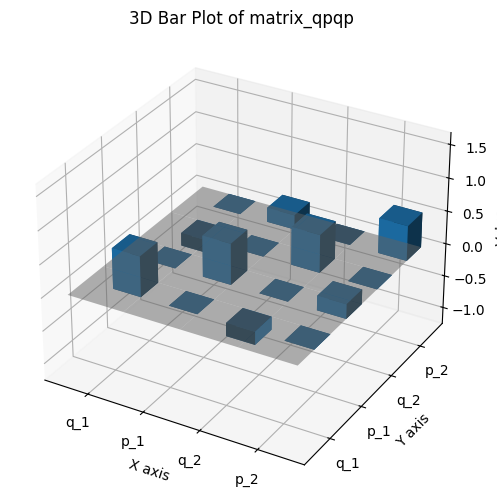

In [11]:
from mpl_toolkits.mplot3d import Axes3D
# Create a new figure for the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for the 3D bar plot
x_data, y_data = np.meshgrid(np.arange(matrix_qpqp.shape[0]), np.arange(matrix_qpqp.shape[1]))
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = np.zeros_like(x_data)
dx = dy = 0.5
dz = matrix_qpqp.flatten()

# Plot the 3D bar plot
ax.bar3d(x_data, y_data, z_data, dx, dy, dz, shade=True)

# 绘制一个 z=0 的平面，并调节它的透明度
x_plane, y_plane = np.meshgrid(np.arange(-0.5, 4.5), np.arange(-0.5, 4.5))
z_plane = np.zeros_like(x_plane)
ax.plot_surface(x_plane, y_plane, z_plane, color='gray', alpha=0.5)


ax.set_zlim(np.min(dz) - 1, np.max(dz) + 1)
# Set axis labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Values')

# Set custom tick labels for x and y axes
ax.set_xticks(np.arange(4))
ax.set_xticklabels(['q_1', 'p_1', 'q_2', 'p_2'])
ax.set_yticks(np.arange(4))
ax.set_yticklabels(['q_1', 'p_1', 'q_2', 'p_2'])

# Set the title of the plot
ax.set_title('3D Bar Plot of matrix_qpqp')

# Show the plot
plt.show()

